In [1]:
import numpy as np
import pandas as pd
from rdflib import Graph

In [133]:
output = 'Plot_Community_Analysis/'

input_path = 'result/TransE/Kmeans/th_85/'

cls_0 = input_path + "cluster-0.txt"
cls_1 = input_path + "cluster-1.txt"

cluster_0 = pd.read_csv(cls_0, delimiter=",", header=None)
cluster_1 =pd.read_csv(cls_1, delimiter=",", header=None)

cluster_0.columns = ['s']
cluster_1.columns = ['s']

cluster_0.shape[0]

279

In [134]:
cluster_0.head()

,s
0,https://w3id.org/i40/sto#IEC_61400_P25_S6_E2
1,https://w3id.org/i40/sto#ISO_9000
2,https://w3id.org/i40/sto#NIST_500-291
3,https://w3id.org/i40/sto#IEC_60839_P7_S4_E1
4,https://w3id.org/i40/sto#W3C_RDF


## Load the Test-Set

In [135]:
input_ = 'sto/hasClassification/'
g = Graph()
g.parse(input_+'test_set_hasClassification.nt', format="nt")

test_set = pd.DataFrame(columns=['s', 'p', 'o'])
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        PREFIX sto: <https://w3id.org/i40/sto#>
        select distinct ?s ?p ?o where {
            ?s ?p ?o .
        }""")
sub = []
pre = []
obj = []
for row in qres:
    sub.append(str("%s" %row['s']))
    pre.append(str("%s" %row['p']))
    obj.append(str("%s" %row['o']))
test_set.s=sub
test_set.p=pre
test_set.o=obj
test_set.head()

,s,p,o
0,https://w3id.org/i40/sto#IEC_81714,https://w3id.org/i40/sto#hasClassification,https://w3id.org/i40/sto#RAMIProduct
1,https://w3id.org/i40/sto#IEC_61987_X,https://w3id.org/i40/sto#hasClassification,https://w3id.org/i40/sto#RAMIControlDevice
2,https://w3id.org/i40/sto#ISO_18828-2,https://w3id.org/i40/sto#hasClassification,https://w3id.org/i40/sto#RAMIFieldDevice
3,https://w3id.org/i40/sto#IEC_61360,https://w3id.org/i40/sto#hasClassification,https://w3id.org/i40/rami#Engineering
4,https://w3id.org/i40/sto#ISO_13374,https://w3id.org/i40/sto#hasClassification,https://w3id.org/i40/sto#RAMIEnterprise


In [146]:
cls = cluster_1
sub = pd.DataFrame(test_set['s'])
sub = sub.drop_duplicates().reset_index(drop=True)
print(sub.shape[0])
sub.head()

56


,s
0,https://w3id.org/i40/sto#IEC_81714
1,https://w3id.org/i40/sto#IEC_61987_X
2,https://w3id.org/i40/sto#ISO_18828-2
3,https://w3id.org/i40/sto#IEC_61360
4,https://w3id.org/i40/sto#ISO_13374


## Intersected cluster standards and test-set standards

In [147]:
intersected_df = pd.merge(cls, sub, how='inner', on='s')
intersected_df = intersected_df.drop_duplicates().reset_index(drop=True)
print(intersected_df.shape[0])
intersected_df.head()

15


,s
0,https://w3id.org/i40/sto#ISO_ASTM_52915
1,https://w3id.org/i40/sto#ISO_13584
2,https://w3id.org/i40/sto#IEC_62541
3,https://w3id.org/i40/sto#ISO_13849
4,https://w3id.org/i40/sto#IEC_61131


## Select the classification standards of intersected between cluster and Test-Set

In [148]:
classification_test_set = test_set.loc[test_set['s'].isin(intersected_df.s)]
classification_test_set = pd.DataFrame(classification_test_set['o']).drop_duplicates().reset_index(drop=True)
print(classification_test_set.shape[0])
classification_test_set.head(10)

26


,o
0,https://w3id.org/i40/sto#RAMIFieldDevice
1,https://w3id.org/i40/rami#Engineering
2,https://w3id.org/i40/sto#RAMIAssetlayer
3,https://w3id.org/i40/sto#RAMIStation
4,https://w3id.org/i40/rami#Safety
5,https://w3id.org/i40/sto#IIRASecurity
6,https://w3id.org/i40/sto#Communication
7,https://w3id.org/i40/sto#RAMICommunicationlayer
8,https://w3id.org/i40/sto#RAMIWorkCenter
9,https://w3id.org/i40/sto#RAMIConnectedWorld


## Select the standards classification of the cluster 

In [149]:
input_ = 'sto/hasClassification/'
g = Graph()
g.parse(input_+'training_set_hasClassification.nt', format='nt')

list_pd = pd.DataFrame(columns=['o'])
obj = []
for standard in cls['s']:
    qres = g.query(
        """PREFIX owl: <http://www.w3.org/2002/07/owl#>
                PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
                PREFIX sto: <https://w3id.org/i40/sto#>

            select distinct ?o where {
                    <""" +standard+ """> sto:hasClassification ?o .
            }""")

    for row in qres:
        obj.append(str("%s" %row['o']))

list_pd.o=obj
list_pd = list_pd.drop_duplicates().reset_index(drop=True)
print(list_pd.shape[0])
list_pd.head(10)

33


,o
0,https://w3id.org/i40/sto#ProductionSystemEngin...
1,https://w3id.org/i40/rami#Identification
2,https://w3id.org/i40/sto#RAMIWorkCenter
3,https://w3id.org/i40/sto#RAMIFieldDevice
4,https://w3id.org/i40/sto#RAMIEnterprise
5,https://w3id.org/i40/sto#RAMICommunicationlayer
6,https://w3id.org/i40/sto#RAMIStation
7,https://w3id.org/i40/sto#SCADALevel
8,https://w3id.org/i40/sto#RAMIControlDevice
9,https://w3id.org/i40/sto#DataSovereignty


### The intersection of classification of standards that belong to test_set and cluster with standards classification of the cluster

In [150]:
intersected_cls = pd.merge(classification_test_set, list_pd, how='inner', on='o')
#intersected_cls = intersected_cls.drop_duplicates().reset_index(drop=True)
intersected_cls.shape[0]

15

## Accuracy

In [151]:
intersected_cls.shape[0]/classification_test_set.shape[0]

0.5769230769230769

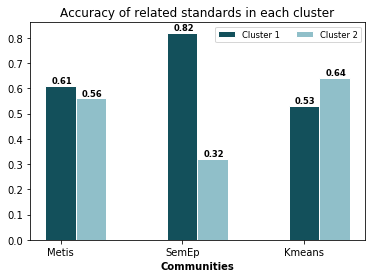

In [584]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
 
# set height of bar (TransD_th85)
#bars1 = [0.43, 0.42, 0.39]
#bars2 = [0.72, 0.67, 0.65]

# set height of bar (TransE_th85)
#bars1 = [0.85, 0.49, 0.64]
#bars2 = [0.57, 0.67, 0.78]

# set height of bar (TransR_th85)
bars1 = [0.61, 0.82, 0.53]
bars2 = [0.56, 0.32, 0.64]

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
r1 = [0,0.4,0.8]
#r1 = [0,0.9,1.9]
r2 = [x + barWidth for x in r1]


# Make the plot
plt.bar(r1, bars1, color='#13505b', width=barWidth, edgecolor='white', label='Cluster 1')
plt.bar(r2, bars2, color='#90bfc9', width=barWidth, edgecolor='white', label='Cluster 2')

# Add xticks on the middle of the group bars
plt.xlabel('Communities', fontweight='bold')
plt.xticks([0,0.4,0.8], ['Metis', 'SemEp', 'Kmeans'])
#plt.xticks([0.3,1.3,2.2], ['Metis', 'SemEp', 'Kmeans'])
plt.title('Accuracy of related standards in each cluster')

for i, v in enumerate(bars1):
    plt.text(r1[i]-0.03, v+0.01, str(v), color='black', fontweight='bold', fontsize='small')
for i, v in enumerate(bars2):
    plt.text(r2[i]-0.03, v+0.01, str(v), color='black', fontweight='bold', fontsize='small')


#plt.ylabel('Number of link prediction')
# Create legend & Show graphic
legend = plt.legend(loc='upper right', shadow=False, fontsize='small', ncol=2)

plt.savefig(output+"Accuracy of related standards(TransR_th85).pdf", format='pdf', bbox_inches = 'tight')
plt.show()

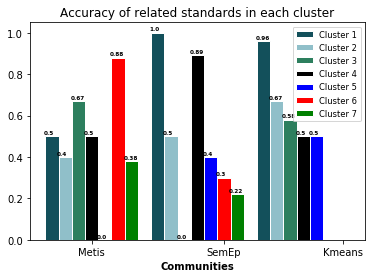

In [623]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
 
# set height of bar (TransD_th90)
"""
bars1 = [0.17, 0.00, 0.17]
bars2 = [0.17, 0.17, 0.49]
bars3 = [0.20, 0.24, 0.25]
bars4 = [0.33, 0.26, 0.09]
bars5 = [0.25, 0.21, 0.40]
bars6 = [0.17, 0.39, 0.13]
bars7 = [0.18, 0.20, 0.00]
"""
# set height of bar (TransH_th85)
bars1 = [0.50, 1.00, 0.96]
bars2 = [0.40, 0.50, 0.67]
bars3 = [0.67, 0.00, 0.58]
bars4 = [0.50, 0.89, 0.50]
bars5 = [0.00, 0.40, 0.50]
bars6 = [0.88, 0.30, 0.00]
bars7 = [0.38, 0.22, 0.00]

# Set position of bar on X axis
#r1 = np.arange(len(bars1))
#r1 = [0,0.4,0.8]
r1 = [0,0.8,1.6]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

# Make the plot
plt.bar(r1, bars1, color='#13505b', width=barWidth, edgecolor='white', label='Cluster 1')
plt.bar(r2, bars2, color='#90bfc9', width=barWidth, edgecolor='white', label='Cluster 2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Cluster 3')
plt.bar(r4, bars4, color='black', width=barWidth, edgecolor='white', label='Cluster 4')
plt.bar(r5, bars5, color='blue', width=barWidth, edgecolor='white', label='Cluster 5')
plt.bar(r6, bars6, color='red', width=barWidth, edgecolor='white', label='Cluster 6')
plt.bar(r7, bars7, color='green', width=barWidth, edgecolor='white', label='Cluster 7')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='N_relatedTo')

# Add xticks on the middle of the group bars
plt.xlabel('Communities', fontweight='bold')
#plt.xticks([0,0.4,0.8], ['Metis', 'SemEp', 'Kmeans'])
plt.xticks([0.3,1.3,2.2], ['Metis', 'SemEp', 'Kmeans'])
plt.title('Accuracy of related standards in each cluster')

for i, v in enumerate(bars1):
    plt.text(r1[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars2):
    plt.text(r2[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars3):
    plt.text(r3[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars4):
    plt.text(r4[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars5):
    plt.text(r5[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars6):
    if v!=0:
        plt.text(r6[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')
for i, v in enumerate(bars7):
    if v!=0:
        plt.text(r7[i]-0.06, v+0.01, str(v), color='black', fontweight='bold', fontsize='xx-small')

#plt.ylabel('Number of link prediction')
# Create legend & Show graphic
legend = plt.legend(loc='upper right', shadow=False, fontsize='small', ncol=1)

#plt.legend(loc='upper left')
#plt.savefig(output+"Accuracy of related standards(TransH_th85).pdf", format='pdf', bbox_inches = 'tight')
plt.show()

In [91]:
g = Graph()
g.parse("sto/hasClassification/training_set_hasClassification.nt", format="nt")

qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select ?o where {
            ?s rdf:type sto:Standard .
            ?s sto:hasClassification ?o .
    }""")
        
classification = pd.DataFrame(columns=['o'])
obj = []
for row in qres:
    obj.append(str("%s" %row))
classification.o=obj

In [92]:
classification.shape[0]

56

In [25]:
classification_sto = pd.DataFrame(columns=['classification',  'number_standard'])
classification_sto.classification=list(pd.value_counts(classification['o'].values, 0).index)
classification_sto.number_standard = list(pd.value_counts(classification['o'].values, 0))
classification_sto = classification_sto.sort_values(by='number_standard', ascending=False).reset_index(drop=True)

classification_sto
classification_sto.to_csv(output+'classification_sto(training-set).csv', index=None)